In [416]:
%pylab inline

from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.collections import PatchCollection

from ipywidgets import interact, HTML, FloatSlider
from IPython.display import clear_output, display

import numba as nb
import time

Populating the interactive namespace from numpy and matplotlib


In [417]:
G = 6.67e-11

dt = 10
stepN = 10

In [418]:
xyDistribution = [
                 [1000.0, 1000.0],
                 [-1000.0, -1000.0],
                 ]

xyDistribution=np.array(xyDistribution)
#print(xyDistribution.shape)
nParticles = 2
# xyDistribution = np.random.normal(0, 500, size = (nParticles, 2))
velocityDistribution = np.zeros_like(xyDistribution, dtype = np.float)


mDistribution = [3e14, 3e14]
#mDistribution = np.ones(nParticles, dtype=float) * 3e14

ParticlePositionHistory = np.zeros((stepN,nParticles,2))

timeArray = np.zeros(stepN)
for i in range(stepN):
    timeArray[i] = i*dt

[]

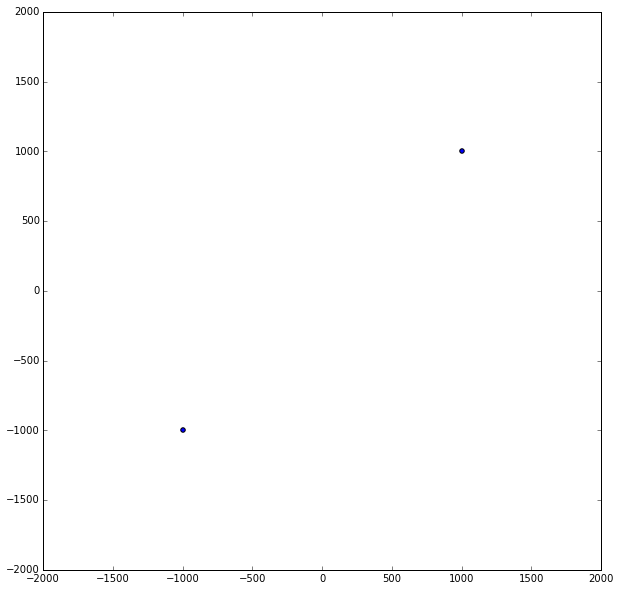

In [419]:
plt.figure(figsize=(10,10))
plt.scatter(xyDistribution[:,0], xyDistribution[:,1], c='b')
plt.xlim(-2000, 2000)
plt.ylim(-2000, 2000)
plt.plot()

In [420]:
def gravityvelocity(dt, stepN):
    
    global velocityDistribution
    global xyDistribution
    
    deltaV = np.zeros_like(xyDistribution, dtype = np.float)
    #t = 0
    for i in range(stepN):
        #t+=dt
        print(i)
        for i in range(0, len(mDistribution)):
            for j in range(0, len(mDistribution)):
                #print (i, j)
                if (j!=i):
                    xdist = (xyDistribution[i,0]-xyDistribution[j,0])
                    ydist = (xyDistribution[i,1]-xyDistribution[j,1])
                    #print(xdist)
                    #print(ydist)

                    if(xdist==0):
                        deltaV[i,0] += 0
                    elif(xdist!=0):
                        deltaV[i,0] += -G*mDistribution[j]*xdist/((np.sqrt(xdist**2+ydist**2))**3)
                        #print("blah", -G*mDistribution[i]/(np.sqrt(abs(position[j,0]-position[i,0]))**2))
                        #print("v", i, "x", velocityDistribution[i,0])

                    if(ydist==0):
                        deltaV[i,1] += 0
                    elif(ydist!=0):
                        deltaV[i,1] += -G*mDistribution[j]*ydist/((np.sqrt(xdist**2+ydist**2))**3)
                        #print("v", i, "y", velocityDistribution[i,1])
        
        velocityDistribution += dt*deltaV
        print("2nd", i)
        xyDistribution += dt*velocityDistribution
        ParticlePositionHistory[i,:,:] = xyDistribution
        #print(i, ParticlePositionHistory)

In [421]:
# def position(dt, stepN):
    
#     global xyDistribution
    
#     for i in range(stepN):
#         xyDistribution += dt*velocitydistribution

In [422]:
# def RK1(f, dt, position, velocity, stepN):
    
#     t = 0
#     for i in range(stepN):
#         t+=dt
#         velocity += dt*gravity(position, velocity)
#         ParticlePositionHistory[:,:,i] = position #WRONG
#     #print(position)
#     #print(position.shape)
#     return position

In [423]:
xyDistributionOld = np.copy(xyDistribution) 


# numbaRK = nb.autojit(RK1)
# numbaGrav = nb.autojit(gravity)
t0 = time.time()
# velocityDistribution = RK1(gravity, dt, xyDistribution, velocityDistribution, stepN)
# xyDistribution = RK1()
gravityvelocity(dt,stepN)
#position(dt,stepN)
t1 = time.time()
print(t1-t0)
print (xyDistribution)


0
2nd 1
1
2nd 1
2
2nd 1
3
2nd 1
4
2nd 1
5
2nd 1
6
2nd 1
7
2nd 1
8
2nd 1
9
2nd 1
0.000659942626953
[[ 960.89858196  960.89858196]
 [-960.89858196 -960.89858196]]


[[[   0.            0.        ]
  [   0.            0.        ]]

 [[ 960.89858196  960.89858196]
  [-960.89858196 -960.89858196]]

 [[   0.            0.        ]
  [   0.            0.        ]]

 [[   0.            0.        ]
  [   0.            0.        ]]

 [[   0.            0.        ]
  [   0.            0.        ]]

 [[   0.            0.        ]
  [   0.            0.        ]]

 [[   0.            0.        ]
  [   0.            0.        ]]

 [[   0.            0.        ]
  [   0.            0.        ]]

 [[   0.            0.        ]
  [   0.            0.        ]]

 [[   0.            0.        ]
  [   0.            0.        ]]]


IndexError: index 99 is out of bounds for axis 0 with size 10

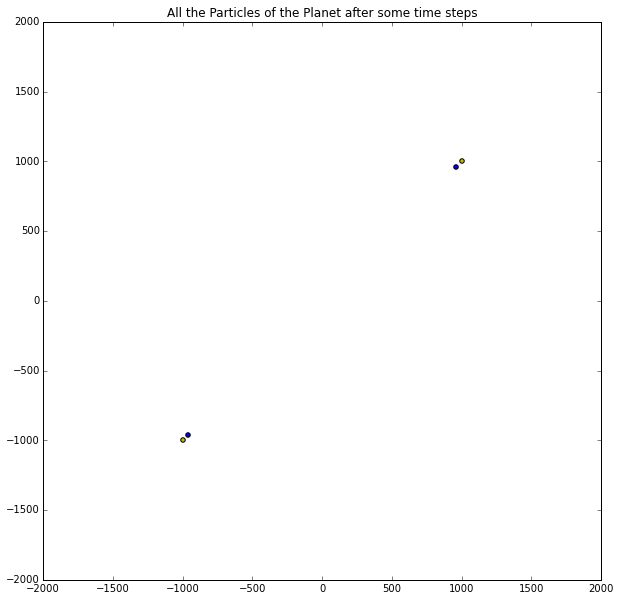

In [424]:
plt.figure(figsize=(10,10))
plt.scatter(xyDistributionOld[:,0], xyDistributionOld[:,1], c='y')
plt.scatter(xyDistribution[:,0], xyDistribution[:,1], c='b')
plt.title("All the Particles of the Planet after some time steps")
plt.xlim(-2000, 2000)
plt.ylim(-2000, 2000)
plt.plot()
print(ParticlePositionHistory)

plt.figure(figsize=(10,10))
plt.scatter(ParticlePositionHistory[9,:,0], ParticlePositionHistory[99,:,1])
plt.xlim(-2000, 2000)
plt.ylim(-2000, 2000)
plt.plot()


In [ ]:
slider = FloatSlider(description='Time', min=0, max=stepN, step=1)

def update_plot():
    time=slider.value
    x = ParticlePositionHistory[time-1,:,0]
    y = ParticlePositionHistory[time-1,:,1]
    fig = plt.figure()
    plt.scatter(x, y)
    plt.xlim(-2000,2000)
    plt.ylim(-2000,2000)

    clear_output(True)

slider.on_trait_change(update_plot, 'value')


display(slider)
update_plot()